## Introduction

Dataset: https://www.kaggle.com/abhinand05/magic-gamma-telescope-dataset

This dataset found on Kaggle contains simulated data that is captured by a ground telescope containing 2 classes: gamma ray showers (g) and hadronic showers (h). Without getting into too much of the math, our earth is hit by many small particles such as protons at very high energies and these come in the form of cosmic air showers. The Cherenkov gamma telescope is able to observes high energy gamma rays that enter through earth's atmosphere, and is able to differentiate between gamma ray showers and hadronic showers.
Here is a simple image showcasing the differences of these 2 showers:
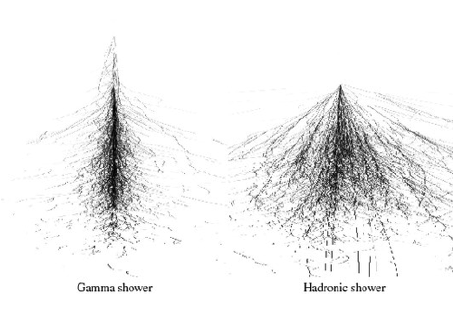
Source: https://www.researchgate.net/figure/The-different-character-of-electromagneticgamma-and-hadronic-showers-19_fig2_270824497

The data provided is simply just different attributes of each gamma/hadron shower that was captured by the telescope, and we will will be doing predictive analytics to figure out if we can create a model that can differentiate these 2 classes.

## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Loading Data

In [2]:
df = pd.read_csv("telescope_data.csv")
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Manipulating Data and Checking Class Distribution

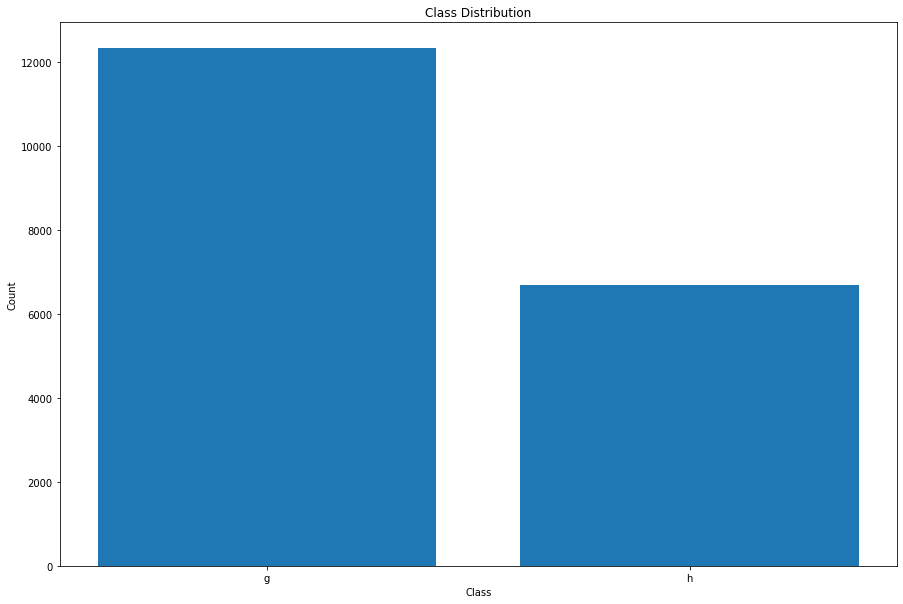

g = gamma and h = hadron
  Class  Count
0     g  12332
1     h   6688


In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)

class_dist = pd.DataFrame(df['class'].value_counts()).reset_index()
class_dist = class_dist.rename(columns = {"index":"Class", "class":"Count"})

plt.figure(figsize=(15,10))
plt.bar(class_dist['Class'], class_dist['Count'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()
print('g = gamma and h = hadron')
print(class_dist)

## Correlations

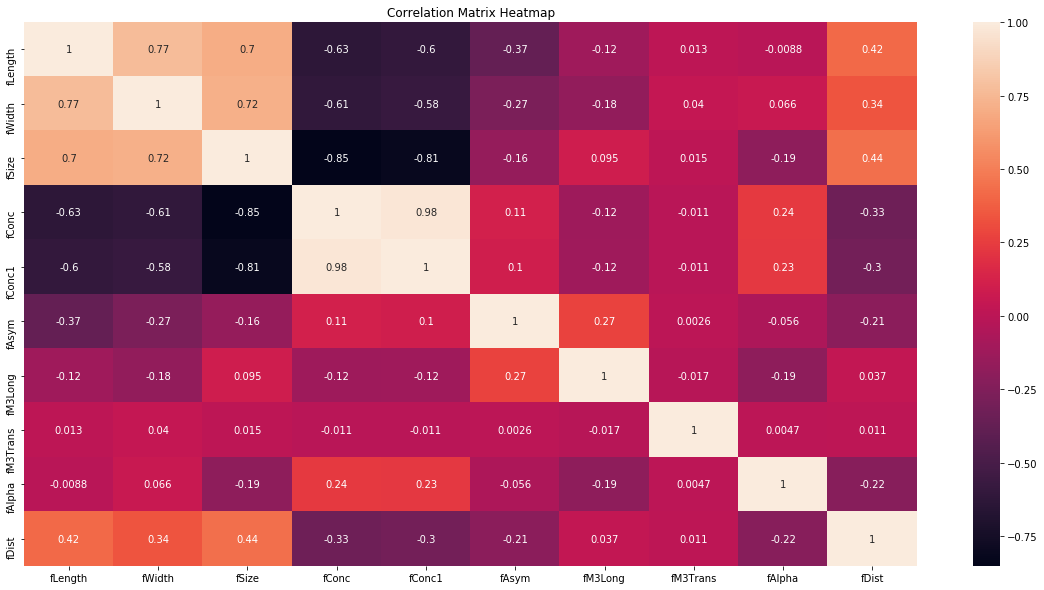

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix Heatmap")
plt.show()

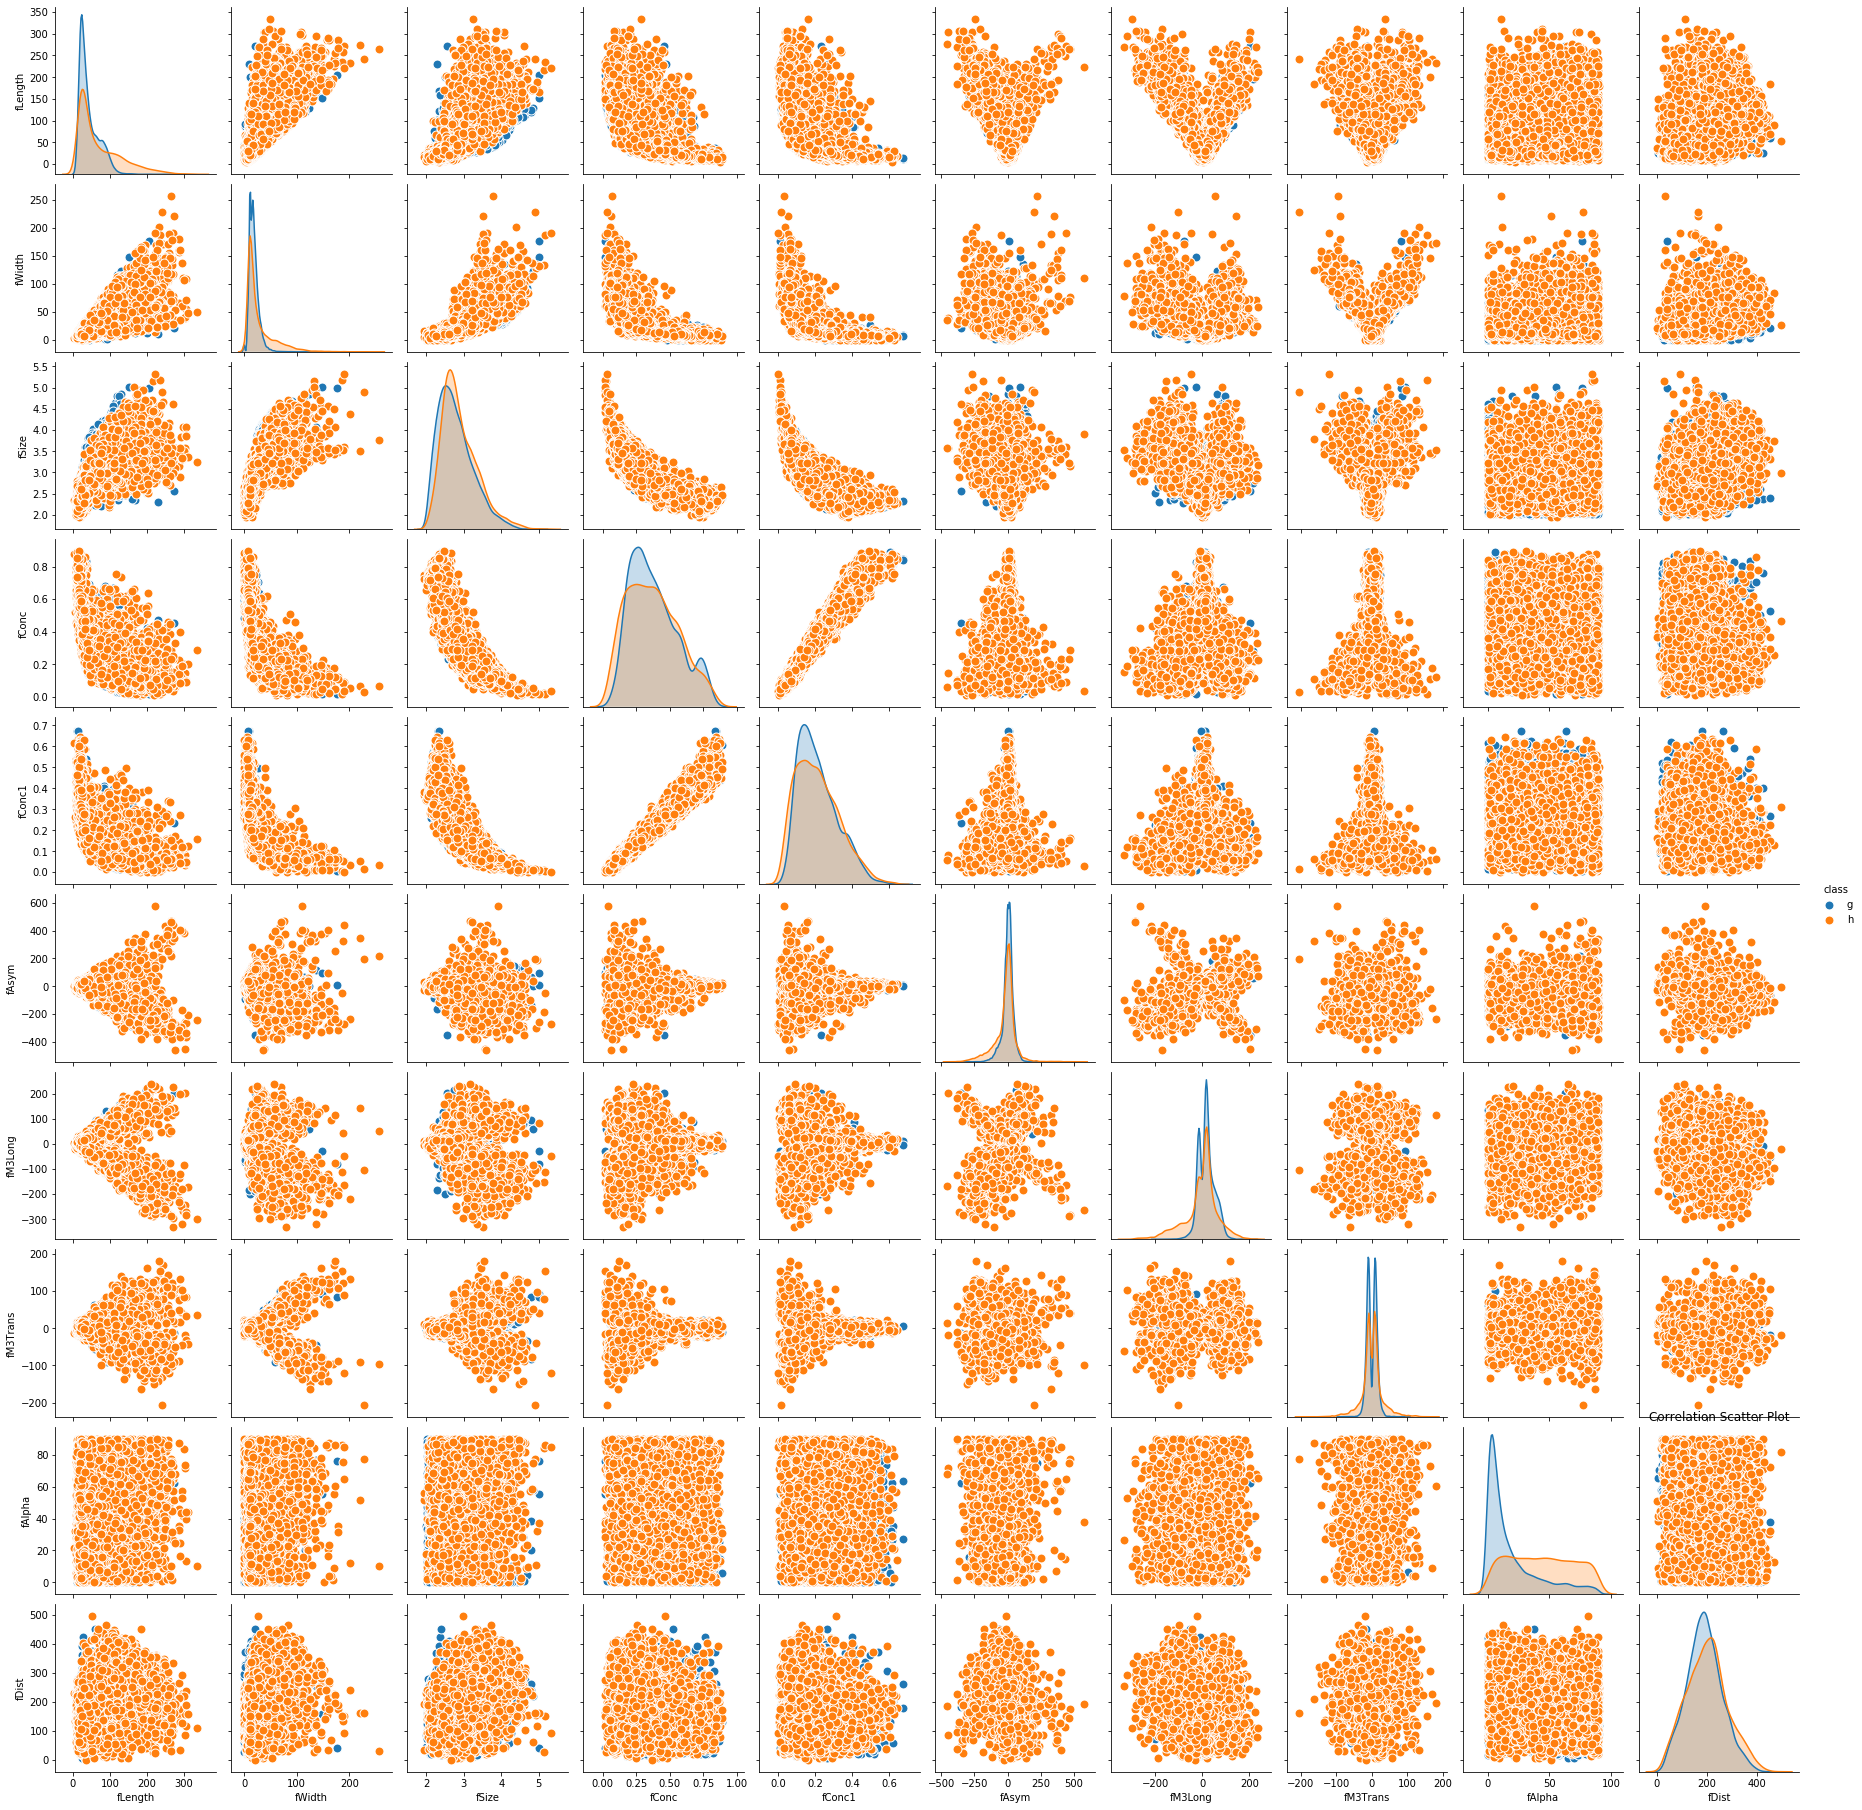

In [5]:
sns.pairplot(df, kind="scatter", hue="class", plot_kws=dict(s=80, edgecolor="white", linewidth=1.0))
plt.title("Correlation Scatter Plot")
plt.show()

## Data Preparation for Predictive Analytics

In [6]:
y = df['class'].values
X = df.iloc[:, :-1].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pd.DataFrame(y_test)[0].value_counts()

0    2466
1    1338
Name: 0, dtype: int64

## Modeling

#### Random Forest

In [7]:
model_rf = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(f'Accuracy of Random Forest Model {accuracy_score(y_test, y_pred_rf) * 100}%')
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(['g', 'h'])
print(cm_rf)

Accuracy of Random Forest Model 88.43322818086226%
['g', 'h']
[[2335  131]
 [ 309 1029]]


#### KMeans Clustering

In [8]:
model_km = KMeans(n_clusters = 2)
model_km.fit(X_train, y_train)
y_pred_km = model_km.predict(X_test)
print(f'Accuracy of KMeans Clustering Model {accuracy_score(y_test, y_pred_km) * 100}%')
cm_km = confusion_matrix(y_test, y_pred_km)
print(['g', 'h'])
print(cm_km)

Accuracy of KMeans Clustering Model 45.3732912723449%
['g', 'h']
[[ 986 1480]
 [ 598  740]]


#### Support Vector Machine

In [9]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print(f'Accuracy of SVM Model {accuracy_score(y_test, y_pred_svm) * 100}%')
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(['g', 'h'])
print(cm_svm)

Accuracy of SVM Model 87.30283911671924%
['g', 'h']
[[2361  105]
 [ 378  960]]


## Model Performance Comparison

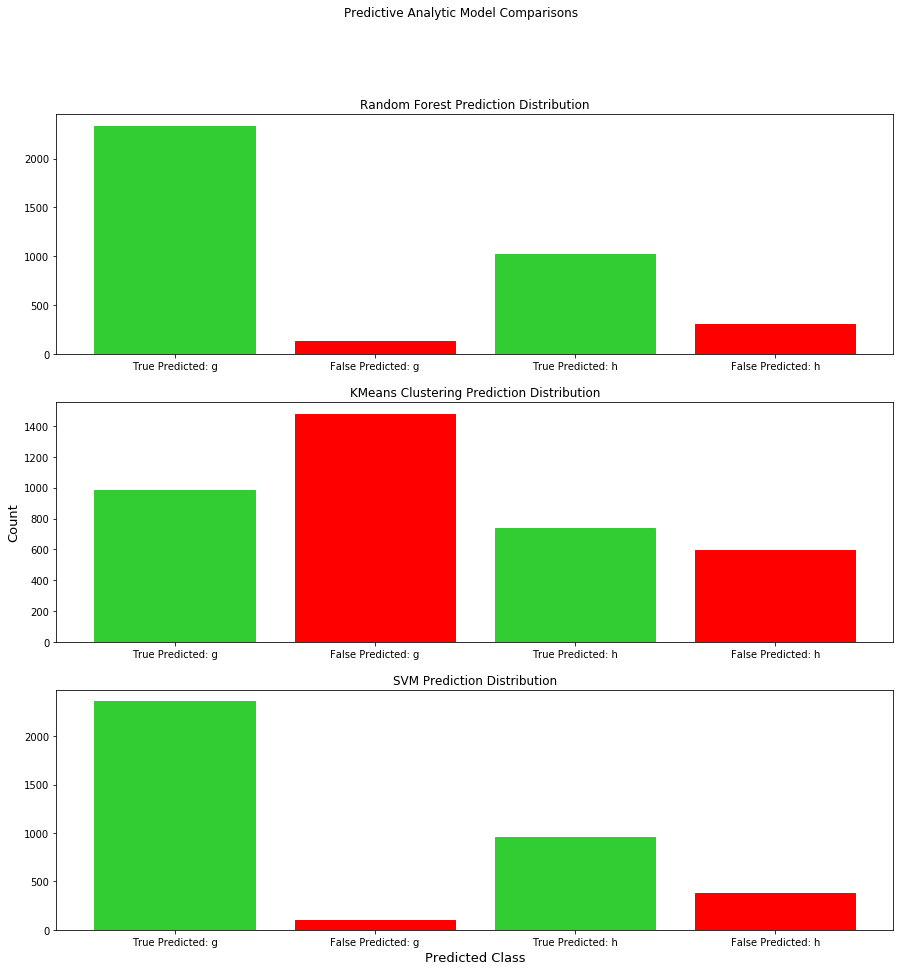

In [10]:
cm_rf[1] = np.flip(cm_rf[1])
cm_km[1] = np.flip(cm_km[1])
cm_svm[1] = np.flip(cm_svm[1])
cm_names = ['True Predicted: g', 'False Predicted: g', 'True Predicted: h', 'False Predicted: h']

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,15))
fig.suptitle('Predictive Analytic Model Comparisons')
ax2.set_ylabel('Count', fontsize=13)

barlist_rf = ax1.bar(cm_names, cm_rf.flatten())
barlist_rf[0].set_color('limegreen')
barlist_rf[1].set_color('r')
barlist_rf[2].set_color('limegreen')
barlist_rf[3].set_color('r')

barlist_km = ax2.bar(cm_names, cm_km.flatten())
barlist_km[0].set_color('limegreen')
barlist_km[1].set_color('r')
barlist_km[2].set_color('limegreen')
barlist_km[3].set_color('r')

barlist_svm = ax3.bar(cm_names, cm_svm.flatten())
barlist_svm[0].set_color('limegreen')
barlist_svm[1].set_color('r')
barlist_svm[2].set_color('limegreen')
barlist_svm[3].set_color('r')

ax1.title.set_text('Random Forest Prediction Distribution')
ax2.title.set_text('KMeans Clustering Prediction Distribution')
ax3.title.set_text('SVM Prediction Distribution')

plt.xlabel('Predicted Class', fontsize=13)
plt.show()

## Conclusion
Our best predictive model for this binary classification problem was Random Forest with an accuracy of 88.43%. Even though the SVM model was less accurate with a test accuracy of 87.3%, we would probably want to go with SVM because according to the Kaggle description, predicting hadron showers as gamma showers is worse than the opposite. In the SVM model, there were less hadron showers predicted as gamma rays so we would want to go with this. 